## Import Libraries and Upload Data

In [1816]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV

In [1817]:
# To see all columns when we print the dataframe
pd.set_option("display.width", 1200)
pd.set_option("display.max_columns", 25)

In [1818]:
# Load Data
data = pd.read_csv("M1_final.csv")

## Understand Data

In [1819]:
# Display Data
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [1820]:
# Rename Columns for Better Understanding
column_names = {"OP_UNIQUE_CARRIER":"Carrier Code",
                "TAIL_NUM":"Flight No",
                "DEST":"Destination",
                "DEP_DELAY":"Departure Delay",
                "CRS_ELAPSED_TIME":"Sch_Duration",
                "CRS_DEP_M":"Sch_Dep_Time",
                "DEP_TIME_M":"Actual_Dep_Time",
                "CRS_ARR_M":"Sch_Arrival_Time",
                "sch_dep":"Sch_Arrival",
                "sch_arr":"Sch_Departure",
                "MONTH":"Month", "DAY_OF_MONTH":"Day of Month", "DAY_OF_WEEK":"Day of Week", "DISTANCE":"Distance"}

## Converting all columns names to lower case >>> 
## data.columns = [x.lower() for x in data.columns]

data = data.rename(column_names, axis=1)

# Display Data
data.head()

,Month,Day of Month,Day of Week,Carrier Code,Flight No,Destination,Departure Delay,Sch_Duration,Distance,Sch_Dep_Time,Actual_Dep_Time,Sch_Arrival_Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,Sch_Arrival,Sch_Departure,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13


#### Brief About the Flight Terms/Variables:

- ***Month:*** Month (1-12)
- ***Day of Month:*** Date of flight (1-31)
- ***Day of Week:*** Day of the week (1-7)
- ***Carrier Code:*** Carrier Code (Should generally be carrier company)
- ***Departure Delay:*** Departure delay of the flight (Sch_Dep_Time	- Actual_Dep_Time)  
Difference in minutes between scheduled and actual departure time. Early departures show negative numbers, in minutes
- ***Sch_Duration:*** Scheduled journey time of the flight
- ***Distance:*** Distance of the flight
- ***Sch_Dep_Time:*** Scheduled departure time
- ***Actual_Dep_Time:*** Actual departure time (Gate checkout of the flight not the take off time)
- ***Sch_Arrival_Time:*** Scheduled arrival time
- ***Tempreture:*** Temperature in Fahrenheit (We will convert this to Centigrade)
- ***Condition:*** Condition of the climate
- ***Sch_Arrival:*** Number of flights scheduled for arrival
- ***Sch_Departure:*** Number of flights scheduled for departure
- ***TAXI_OUT:*** Taxi-out time (Run away time) (Target variable)

In [1821]:
# Convert Fahrenheit to Centigrade
data["Temperature"] = [round((x-32)/1.8, 0) for x in data["Temperature"]]
data.head()

,Month,Day of Month,Day of Week,Carrier Code,Flight No,Destination,Departure Delay,Sch_Duration,Distance,Sch_Dep_Time,Actual_Dep_Time,Sch_Arrival_Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,Sch_Arrival,Sch_Departure,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,9.0,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,9.0,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,9.0,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,9.0,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,8.0,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [1822]:
# Display Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             28820 non-null  int64  
 1   Day of Month      28820 non-null  int64  
 2   Day of Week       28820 non-null  int64  
 3   Carrier Code      28820 non-null  object 
 4   Flight No         28820 non-null  object 
 5   Destination       28820 non-null  object 
 6   Departure Delay   28820 non-null  int64  
 7   Sch_Duration      28820 non-null  int64  
 8   Distance          28820 non-null  int64  
 9   Sch_Dep_Time      28820 non-null  int64  
 10  Actual_Dep_Time   28820 non-null  int64  
 11  Sch_Arrival_Time  28820 non-null  int64  
 12  Temperature       28820 non-null  float64
 13  Dew Point         28820 non-null  object 
 14  Humidity          28820 non-null  int64  
 15  Wind              28818 non-null  object 
 16  Wind Speed        28820 non-null  int64 

- There are 28.820 entries which is the number of flights
- We have 23 features (1 float, 16 integer, 6 object)
- There is NULL values.  
- Dew Point should be numerical but it is object.

In [1823]:
# Converting Dew Point which is an object dtype to an integer.
data["Dew Point"].astype(str).astype(int)

0        34
1        34
2        34
3        34
4        32
         ..
28815    38
28816    38
28817    38
28818    38
28819    38
Name: Dew Point, Length: 28820, dtype: int64

In [1824]:
# Display Data Description
data.describe()

,Month,Day of Month,Day of Week,Departure Delay,Sch_Duration,Distance,Sch_Dep_Time,Actual_Dep_Time,Sch_Arrival_Time,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,Sch_Arrival,Sch_Departure,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,5.279285,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,4.473785,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,-8.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,2.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,6.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,8.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,20.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


- ***Departure Delay:*** It seems that the median delay is -3minutes. Even though outliers appear in our data, these are possible values and there is no need to do anything about the outliers.
- ***Temperatures:*** The average temperature was 5 degrees centigrade.
- ***TAXI_OUT:*** The mean TAXI_OUT is 20 minutes, which can vary between 5-40 minutes. 

---
#### Duplicate Values

In [1825]:
# Remove Duplicate Rows
print("Duplicate Data Sum: ", data.duplicated().sum())
if data.duplicated().sum() != 0:
    print("Before Removing Duplicates:", data.shape[0]) 
    data.drop_duplicates()
    print("After Removing Duplicates:", data.shape[0]) 

Duplicate Data Sum:  0


---
#### Nunique & Unique Values

In [1826]:
# Explore Nunique Values
column_names = list(data.columns)
for col_name in column_names:
    print(col_name, ":", data[col_name].nunique())

Month : 3
Day of Month : 31
Day of Week : 7
Carrier Code : 9
Flight No : 2092
Destination : 65
Departure Delay : 342
Sch_Duration : 327
Distance : 64
Sch_Dep_Time : 606
Actual_Dep_Time : 1240
Sch_Arrival_Time : 970
Temperature : 29
Dew Point : 64
Humidity : 78
Wind : 18
Wind Speed : 30
Wind Gust : 28
Pressure : 149
Condition : 25
Sch_Arrival : 56
Sch_Departure : 47
TAXI_OUT : 37


In [1827]:
# Explore Unique Values
cols = ["Month", "Carrier Code", "Wind"]

for col in cols: 
    if isinstance(col, str):
        print(f"{col}:", data[col].unique())

Month: [11 12  1]
Carrier Code: ['B6' 'DL' 'AA' 'AS' 'MQ' '9E' 'YX' 'HA' 'OO']
Wind: ['W' 'WNW' 'NW' 'NNW' 'S' 'ENE' 'NE' 'NNE' 'E' 'SE' 'CALM' 'SW' 'VAR'
 'SSE' 'SSW' 'WSW' 'N' 'ESE' nan]


---
#### Null Values

In [1828]:
# Check Null Values
data.isnull().sum()

Month               0
Day of Month        0
Day of Week         0
Carrier Code        0
Flight No           0
Destination         0
Departure Delay     0
Sch_Duration        0
Distance            0
Sch_Dep_Time        0
Actual_Dep_Time     0
Sch_Arrival_Time    0
Temperature         0
Dew Point           0
Humidity            0
Wind                2
Wind Speed          0
Wind Gust           0
Pressure            0
Condition           0
Sch_Arrival         0
Sch_Departure       0
TAXI_OUT            0
dtype: int64

There is only 2 Null value so it is better to drop it.

In [1829]:
# Drop Null Rows
data.dropna(inplace=True)

---
## Exploratory Data Analysis

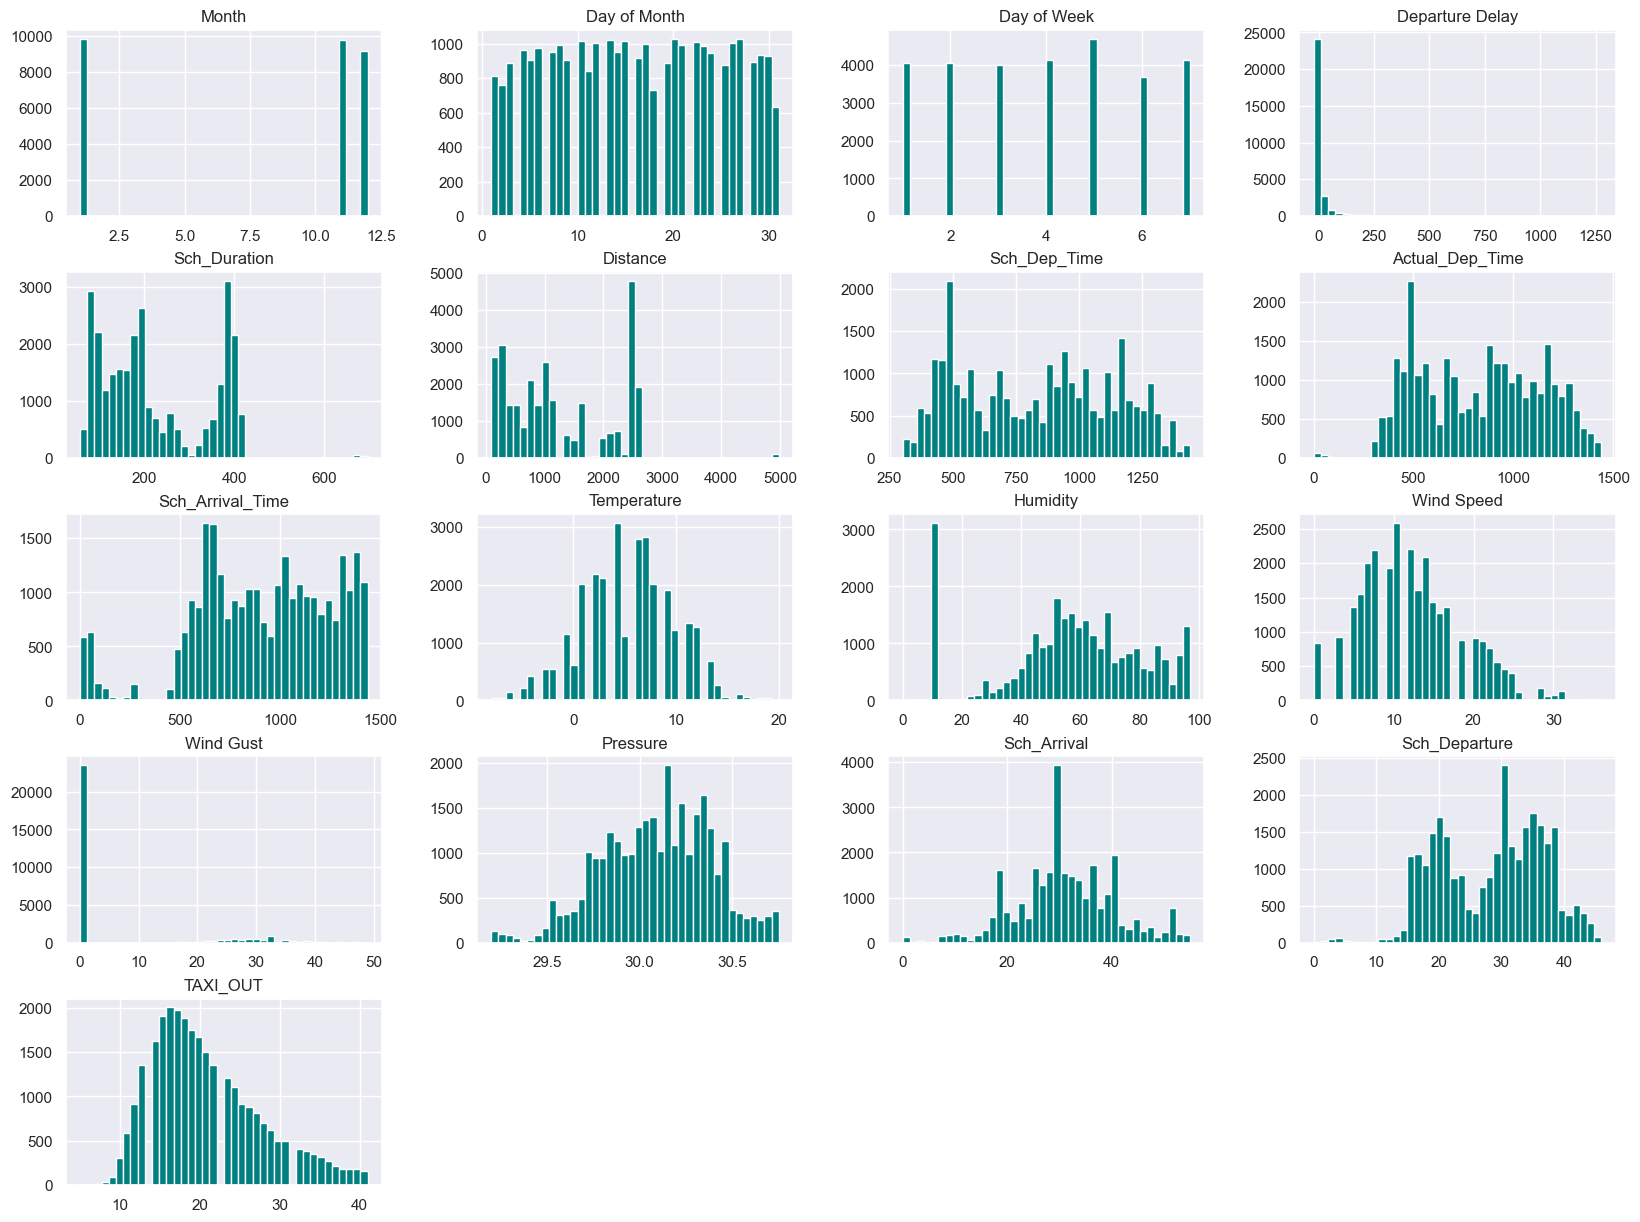

In [1830]:
# Histogram of Variables
data.hist(bins=40, figsize=(20,15), color="teal")
plt.show()

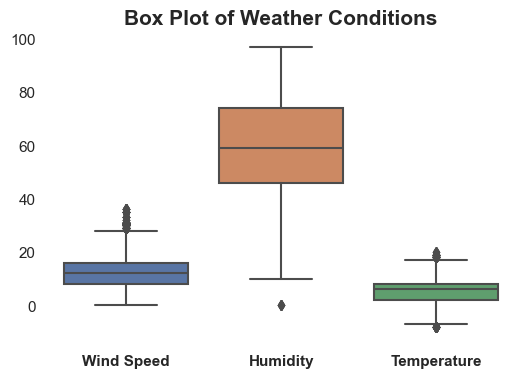

In [1831]:
# Box Plot of Weather Conditions
plt.figure(figsize=(6,4))
sns.boxplot(data=data[["Wind Speed","Humidity","Temperature"]])
plt.title("Box Plot of Weather Conditions", fontsize=15, fontweight="bold")
plt.xticks(fontweight="bold")
plt.gca().set_facecolor("none")

# Add a Legend
# plt.legend(labels=["Wind Speed (knots)", "Humidity (%)", "Temperature (°C)"], loc="upper left")

---
### Which month and day of the week had the highest number of flight delays?

In [1833]:
# Group the Data by Day of the Week
m_grouped = data.groupby("Month")
d_grouped = data.groupby("Day of Week")

# Calculate the Mean of the Departure Delay Column for Each Group
mean_dep_delay_m = m_grouped["Departure Delay"].mean()
mean_dep_delay_d = d_grouped["Departure Delay"].mean()

# Find the Day of the Week with the Highest Average Delay
max_month = mean_dep_delay_m.idxmax()
max_day = mean_dep_delay_d.idxmax()

print("The month with the highest number of flight delays was", max_month)
#print(mean_dep_delay_m)
print("\nThe day of the week with the highest number of flight delays was", max_day)
#print(mean_dep_delay_d)

The month with the highest number of flight delays was 12

The day of the week with the highest number of flight delays was 6


---
### What was the number of flights based on taxi-out times?

In [1834]:
# Count of Taxi-Out Time
taxi_out_counts = data["TAXI_OUT"].value_counts().rename_axis("Taxi-Out Time").reset_index(name="Counts")
taxi_out_counts = taxi_out_counts.sort_values("Taxi-Out Time")
taxi_out_counts.head()

,Taxi-Out Time,Counts
35,5,1
36,6,1
34,7,13
33,8,28
32,9,91


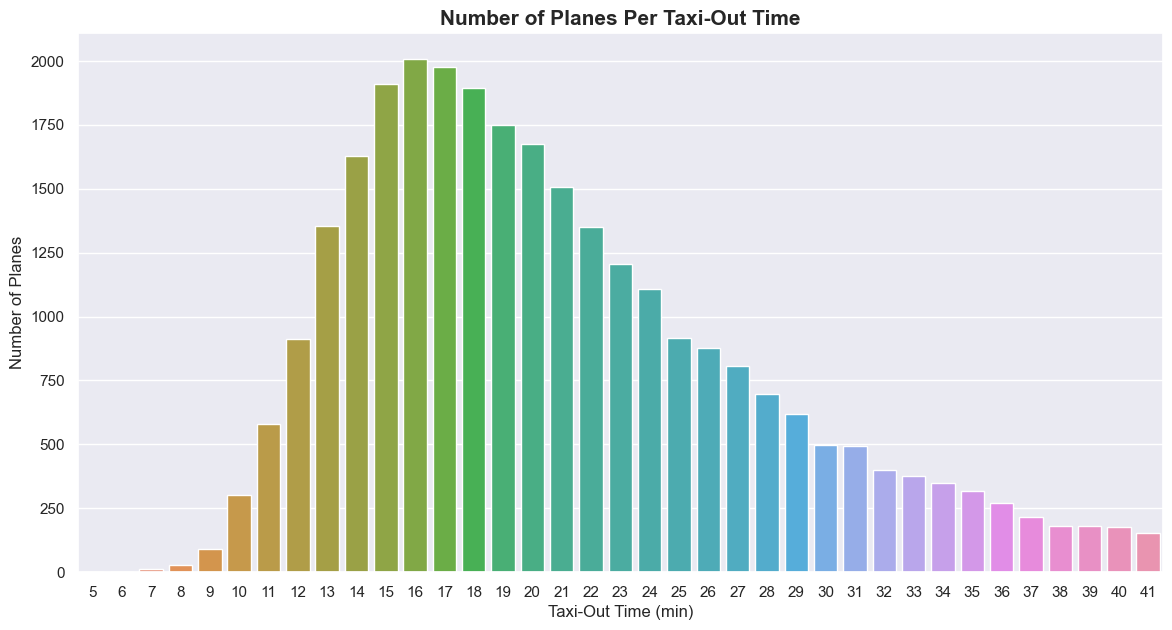

In [1835]:
# Number of Planes Per Taxi-Out Time
plt.figure(figsize=(14,7))
sns.set(style="darkgrid")
ax = sns.barplot(x = "Taxi-Out Time", y = "Counts", data=taxi_out_counts)

ax.set_title("Number of Planes Per Taxi-Out Time", fontsize=15, fontweight="bold")
ax.set(xlabel="Taxi-Out Time (min)", ylabel= "Number of Planes")
plt.show()

---
### What was the delay percentage of flights?

In [1836]:
# Calculate Flight Delays
delay = np.where(data["Departure Delay"] > 0, 1, 0).sum() / data.shape[0] * 100
early = np.where(data["Departure Delay"] < 0, 1, 0).sum() / data.shape[0] * 100
on_time = np.where(data["Departure Delay"] == 0, 1, 0).sum() / data.shape[0] * 100

print("Flights were % {0:.1f} on time, % {1:.1f} delayed and % {2:.1f} early.".format(on_time, delay, early))

Flights were % 5.1 on time, % 27.1 delayed and % 67.8 early.


---
### What were the top 10 weather conditions that caused delays?

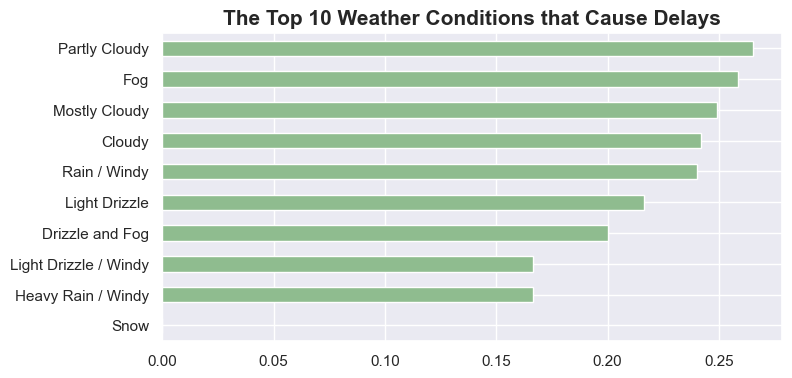

In [1837]:
# Add Delay Column to Dataset
data["delay"] = np.where(data["Departure Delay"] > 0, 1, 0)

# Plot the Top 10 Weather Conditions that Cause Delays
plt.figure(figsize=(8,4))
data.groupby("Condition")["delay"].mean().sort_values()[:10].plot(kind="barh", color = "darkseagreen")
plt.title("The Top 10 Weather Conditions that Cause Delays", fontsize=15, fontweight="bold")
plt.ylabel(None)
plt.show()

---
### What was the relationship between tempereature and departure delay?

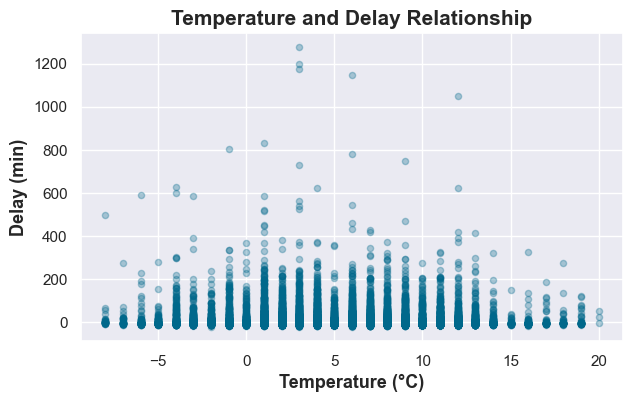

In [1838]:
# Temperature and Delay Relationship
data.plot(kind="scatter", x="Temperature", y="Departure Delay", figsize=(7,4), alpha=0.3, color = "#00688B")
plt.title("Temperature and Delay Relationship", fontsize=15, fontweight="bold")
plt.xlabel("Temperature (°C)", fontsize=13, fontweight="bold")
plt.ylabel("Delay (min)", fontsize=13, fontweight="bold")
plt.show()

---
### What was the company ranking according to the average number of delays?

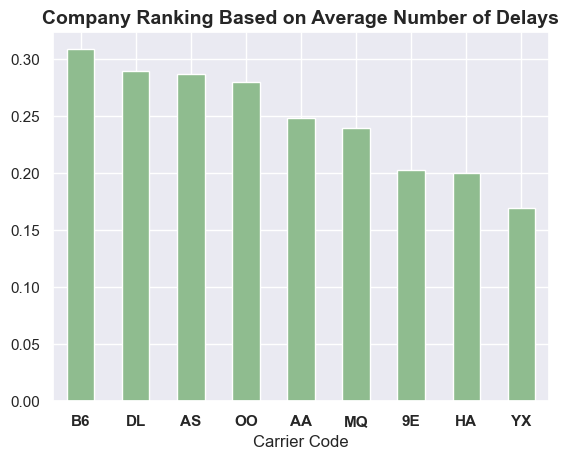

In [1839]:
# Plot Company Ranking Based on Average Number of Delays
data.groupby("Carrier Code")["delay"].mean().sort_values(ascending=False).plot(kind="bar", color = "darkseagreen")
plt.title("Company Ranking Based on Average Number of Delays", fontsize=14, fontweight="bold")
plt.xticks(rotation=360, fontweight="bold")
plt.show()

---
### Prepare Dataset

In [1840]:
# Drop the Delay Column that We Produce
data.drop(["delay"], axis=1, inplace=True)

In [1841]:
# Replacing for Easy Count (Delay=1, Early & On Time = 0)
data["Departure Delay"] = np.where(data["Departure Delay"] > 0, 1, 0)
data.head()

,Month,Day of Month,Day of Week,Carrier Code,Flight No,Destination,Departure Delay,Sch_Duration,Distance,Sch_Dep_Time,Actual_Dep_Time,Sch_Arrival_Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,Sch_Arrival,Sch_Departure,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,0,124,636,324,323,448,9.0,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,0,371,2475,340,333,531,9.0,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,1,181,1069,301,341,482,9.0,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,0,168,944,345,343,513,9.0,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,0,139,760,360,356,499,8.0,32,58,W,24,35,29.91,Fair / Windy,9,17,13


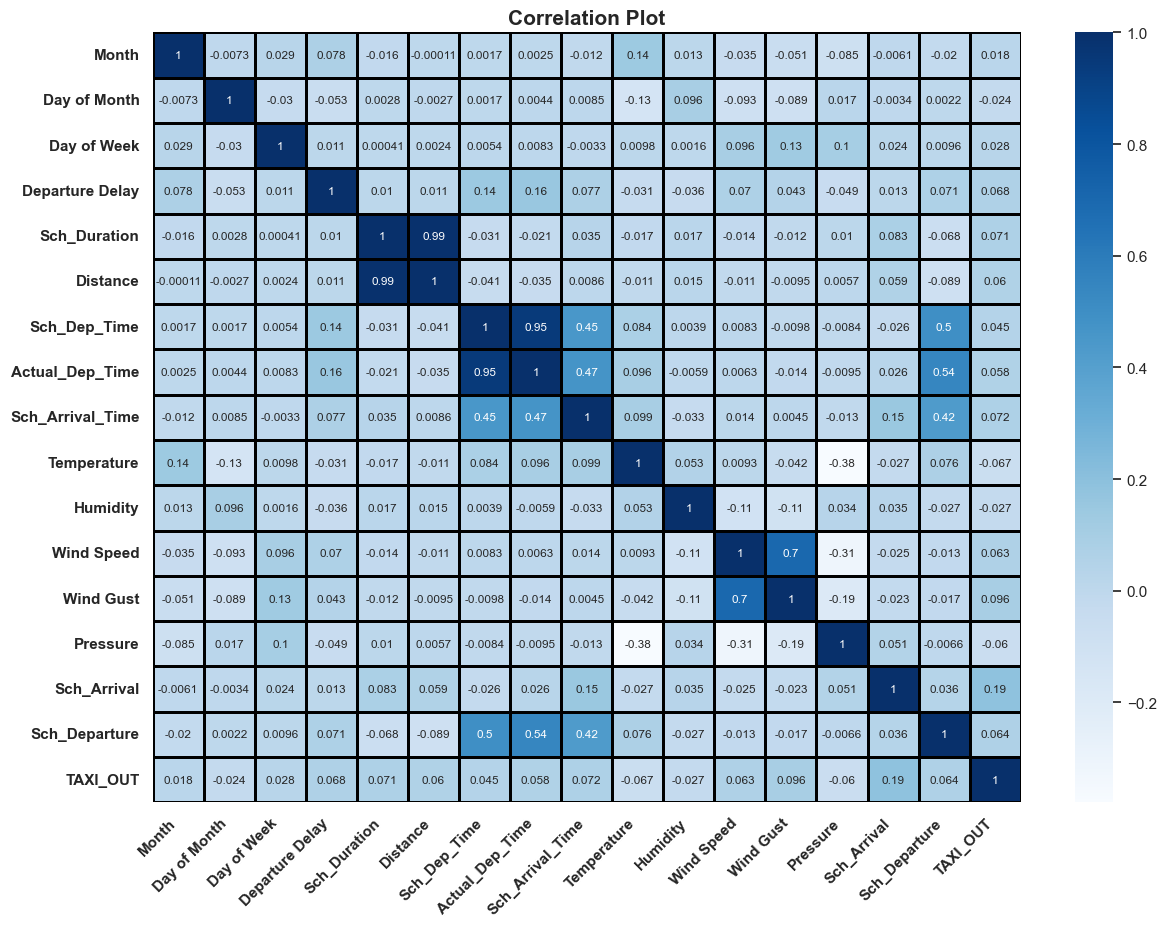

In [1842]:
# Check for Correlation
corr_mat = data.corr(numeric_only =True)

# Showing Correlation Using Heatmap
plt.figure(figsize=(14,10))
ax = sns.heatmap(corr_mat, annot=True, linewidths=1, linecolor="black", annot_kws={"size":8.5}, cmap= "Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.title("Correlation Plot", fontsize=15, fontweight="bold")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")
plt.show()

Considering the relationships between geographical aspects and features, the correlation results are as expected.

In [1843]:
# Drop Objects
data.drop(["Carrier Code"], axis=1, inplace=True)
data.drop(["Flight No"], axis=1, inplace=True)
data.drop(["Destination"], axis=1, inplace=True)
data.drop(["Wind"], axis=1, inplace=True)
data.drop(["Condition"], axis=1, inplace=True)

# Dew Point is related to Humidity so it can be dropped.
data.drop(["Dew Point"], axis=1, inplace=True)  


# Since Distance and Scheduled Duration represent similar things and are highly correlated, we can drop Scheduled Duration.
data.drop(["Sch_Duration"], axis=1, inplace=True)

# Since Departure Delay is important and enough for us we can drop Sch_Dep_Time, Actual_Dep_Time, and Sch_Arrival_Time.
data.drop(["Sch_Dep_Time"], axis=1, inplace=True)
data.drop(["Actual_Dep_Time"], axis=1, inplace=True)
data.drop(["Sch_Arrival_Time"], axis=1, inplace=True)

# Wind Gust and Wind Speed are highly correlated so one can be dropped.
data.drop(["Wind Gust"], axis=1, inplace=True)

# Wind Speed and Pressure are negatively correlated and they represent similar things. Thus, Pressure can be dropped.
data.drop(["Pressure"], axis=1, inplace=True)

In [1844]:
data.head()

,Month,Day of Month,Day of Week,Departure Delay,Distance,Temperature,Humidity,Wind Speed,Sch_Arrival,Sch_Departure,TAXI_OUT
0,11,1,5,0,636,9.0,58,25,9,17,14
1,11,1,5,0,2475,9.0,58,25,9,17,15
2,11,1,5,1,1069,9.0,58,25,9,17,22
3,11,1,5,0,944,9.0,58,25,9,17,12
4,11,1,5,0,760,8.0,58,24,9,17,13


---
## Linear Regression

In [1845]:
# Splitting the dependent and independent variable
x = data.iloc[:, :10].values
y = data.iloc[:, 10].values

In [1846]:
# Spliting Dataset
X_train, X_test, y_train, y_test = train_test_split(x ,y, test_size=2, random_state=32)

In [1847]:
# Standardiazation (feature scaling)
# input data is transformed to have a mean of zero and variance of 1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1848]:
# Create Linear Regression Model
lin_reg = LinearRegression()

# Train the Model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [1849]:
# Prediction
y_pred = lin_reg.predict(X_test)

In [1850]:
# Create a dataframe that will show actual value and the predicted value
result = {"Actual_Value":y_test, "Predicted_Value":y_pred}
result_df = pd.DataFrame(result)
result_df

,Actual_Value,Predicted_Value
0,21,22.072582
1,19,22.141495


In [1851]:
## Metric in regression (Metrics are used in regression to control accuracy)
# RSQUARED 0-- not good, 1-- good
# MEAN ABSOLUTE ERROR       -- average absolute value between actual values and predicted values
# MEAN SQUARED ERROR        -- measure the average squraed differences between the actual and the predicted values
# ROOT MEAN SQUARED ERROR   -- is just the square root of the mean square error
""" Except for Rsquared, all must be close to 0. Any further away from 0 means far from accuracy. """

meanAbError = metrics.mean_absolute_error(y_test, y_pred)
meanSqError = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqrr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("R squared:{:.2f}".format(lin_reg.score(X_test, y_test)))
print("Mean Absolute Error:", meanAbError)
print("Mean Square Error:", meanSqError)
print("Root Mean Square Error:", rootMeanSqrr)

R squared:-4.51
Mean Absolute Error: 2.1070386264623178
Mean Square Error: 5.509711536808694
Root Mean Square Error: 2.347277473331326


---
## Ridge and Lasso Models 

In [1852]:
# Grouping the Dependent and Independent Variable
x = data.iloc[:-1, 1:10]
y = data.iloc[:-1, 10]

In [1853]:
# Define Our Model
model_lasso = Lasso(alpha=0.10)
model_ridge = Ridge(alpha=0.10)

# Fit the Models
model_lasso.fit(x,y)
model_ridge.fit(x,y)

Ridge(alpha=0.1)

In [1854]:
# Define New Data to Predict
new = data.iloc[-1, 1:10]

In [1855]:
# Predict with Lasso Model
prediction_lasso = model_lasso.predict([new])
prediction_lasso

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([18.29533363])

In [1856]:
# Predict with Ridge Model
prediction_ridge = model_ridge.predict([new])
prediction_ridge

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([18.18934438])

In [1857]:
# Tuning Alpha 

# Define Model Evaluation Method
cv = RepeatedKFold(n_splits=2, n_repeats=1, random_state=1)

# Define Model
model = RidgeCV(alphas=np.arange(0.5, 1, 0.01), cv=cv, scoring="neg_mean_absolute_error")

# Fit the Model
model.fit(x,y)

# Summarize Chosen Configuration
print("alpha: %f" % model.alpha_)

alpha: 0.500000


---
---

### How does the Departure Delay vary with Wind Speed?

In [1858]:
# Specify the X and y variables
X = data["Wind Speed"].values.reshape(-1, 1)
y = data["Departure Delay"].values.reshape(-1, 1)

# Train, test and split my data, test size is 30%, 70% is for training
X_train, X_test, Y_train, Y_test = train_test_split (X,y, test_size=0.3, random_state=32)

print("X_Train size is:",X_train.shape)
print("X_Test size is:",X_test.shape)
print("Y_train size is:",Y_train.shape)
print("Y_Test size is:",Y_test.shape)

X_Train size is: (20172, 1)
X_Test size is: (8646, 1)
Y_train size is: (20172, 1)
Y_Test size is: (8646, 1)


In [1859]:
# Create a linear regression object
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

LinearRegression()

In [1860]:
# Make the predictions based on the model
Y_pred = linear_reg.predict(X_test)

# Create a data frame fr predictions 
pd.DataFrame({"Actual": Y_test.reshape(-1), "Predicted": Y_pred.reshape(-1)})

,Actual,Predicted
0,0,0.274299
1,0,0.304415
2,1,0.269997
3,1,0.282904
4,1,0.269997
...,...,...
8641,0,0.252788
8642,0,0.317321
8643,1,0.287206
8644,0,0.295810


In [1861]:
""" Except for Rsquared, all must be close to 0. Any further away from 0 means far from accuracy. """

print("MAE:", metrics.mean_absolute_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print("MSE:", metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1))))
print("R2:", metrics.r2_score(Y_test.reshape(-1), Y_pred.reshape(-1)))

MAE: 0.39215296938970723
MSE: 0.1950748125916064
RMSE: 0.44167274377258825
R2: 0.007475935107007281


---

### How does the Departure Delay vary with Temperature?

In [1862]:
# Specify the X and y variables
X = data["Temperature"].values.reshape(-1, 1)
y = data["Departure Delay"].values.reshape(-1, 1)

# Train, test and split my data, test size is 30%, 70% is for training
X_train, X_test, Y_train, Y_test = train_test_split (X,y, test_size=0.3, random_state=32)

print("X_Train size is:",X_train.shape)
print("X_Test size is:",X_test.shape)
print("Y_train size is:",Y_train.shape)
print("Y_Test size is:",Y_test.shape)

X_Train size is: (20172, 1)
X_Test size is: (8646, 1)
Y_train size is: (20172, 1)
Y_Test size is: (8646, 1)


In [1863]:
# Create a linear regression object
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

# Make the predictions based on the model
Y_pred = linear_reg.predict(X_test)

# Create a data frame fr predictions 
pd.DataFrame({"Actual": Y_test.reshape(-1), "Predicted": Y_pred.reshape(-1)})

,Actual,Predicted
0,0,0.278584
1,0,0.275538
2,1,0.275538
3,1,0.263355
4,1,0.248126
...,...,...
8641,0,0.254217
8642,0,0.284675
8643,1,0.269446
8644,0,0.296859


In [1864]:
""" Except for Rsquared, all must be close to 0. Any further away from 0 means far from accuracy. """

print("MAE:", metrics.mean_absolute_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print("MSE:", metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1))))
print("R2:", metrics.r2_score(Y_test.reshape(-1), Y_pred.reshape(-1)))

MAE: 0.39403919597082343
MSE: 0.1963479972699308
RMSE: 0.44311172098008283
R2: 0.0009980796857872454


---

### How does the TAXI_OUT vary with Departure Delay?

In [1865]:
# Specify the X and y variables
X = data["Departure Delay"].values.reshape(-1, 1)
y = data["TAXI_OUT"].values.reshape(-1, 1)

# Train, test and split my data, test size is 30%, 70% is for training
X_train, X_test, Y_train, Y_test = train_test_split (X,y, test_size=0.3, random_state=32)

print("X_Train size is:",X_train.shape)
print("X_Test size is:",X_test.shape)
print("Y_train size is:",Y_train.shape)
print("Y_Test size is:",Y_test.shape)

X_Train size is: (20172, 1)
X_Test size is: (8646, 1)
Y_train size is: (20172, 1)
Y_Test size is: (8646, 1)


In [1866]:
# Create a linear regression object
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

# Make the predictions based on the model
Y_pred = linear_reg.predict(X_test)

# Create a data frame for predictions 
pd.DataFrame({"Actual": Y_test.reshape(-1), "Predicted": Y_pred.reshape(-1)})

,Actual,Predicted
0,21,20.561015
1,19,20.561015
2,17,21.658514
3,19,21.658514
4,20,21.658514
...,...,...
8641,26,20.561015
8642,19,20.561015
8643,28,21.658514
8644,22,20.561015


In [1867]:
""" Except for Rsquared, all must be close to 0. Any further away from 0 means far from accuracy. """

print("MAE:", metrics.mean_absolute_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print("MSE:", metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1))))
print("R2:", metrics.r2_score(Y_test.reshape(-1), Y_pred.reshape(-1)))

MAE: 5.5173070463296545
MSE: 46.96891989606072
RMSE: 6.853387475990302
R2: 0.003343401381984634
